# Linear Classification

We will do linear classification of images using a linear Support Vector Machine (SVM).


## Required packages

If you are not on Google Colab, then you might have to install `sklearn`.

From a terminal:
```
pip install -U sklearn
```
from Jupyter:
```python
!pip install -U sklearn
```

## Import the necessary packages

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.svm import LinearSVC  # Linear Support Vector Classifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

## Download and explore the data
We will use the ```fetch_openml``` helper function from ```sklearn.datasets``` to download the data from [openml.org](https://www.openml.org/d/40926). The data is a small version of the CIFAR-10 dataset, called ```CIFAR_10_small```. The CIFAR-10 data set is described on [Alex Krizhevsky's homepage](https://www.cs.toronto.edu/~kriz/cifar.html)

In [2]:
data = fetch_openml(name='CIFAR_10_small')

### Explore ```data```

**Question 1**: How can we figure out what type of object ```data``` is?

In [3]:
type(data)

sklearn.utils.Bunch

**Question 2**: How do we check what attributes ```data``` has?

In [4]:
dir(data)

['DESCR',
 'categories',
 'data',
 'details',
 'feature_names',
 'frame',
 'target',
 'target_names',
 'url']

**Question 3**: How do we check the content of the attribute ```DESCR```?

In [ ]:
print(data.DESCR)

**Author**: Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton    
**Source**: [University of Toronto](https://www.cs.toronto.edu/~kriz/cifar.html) - 2009  
**Please cite**: Alex Krizhevsky (2009) Learning Multiple Layers of Features from Tiny Images, Tech Report.

**CIFAR-10 small**  
This is a 20,000 instance sample of the original CIFAR-10 dataset. Sampled randomly and stratified, with 2000 examples per class. Training and test set are merged. Find the corresponding task for the original train-test splits.

CIFAR-10 is a labeled subset of the [80 million tiny images dataset](http://groups.csail.mit.edu/vision/TinyImages/). It (originally) consists 32x32 color images representing 10 classes of objects:  
0. airplane  
1. automobile          
2. bird          
3. cat          
4. deer          
5. dog          
6. frog          
7. horse          
8. ship          
9. truck          

The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Aut

**Question 4**: In what attribute are the inputs (X) and what in what type of object are they stored?

In [8]:
type(data.target_names)

list

**Queston 5**: How can we check how many examples/rows (i.e. individual images) the data set contains?

In [9]:
data.data.info()
data.data.shape
data.data.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 3072 entries, a0 to a3071
dtypes: float64(3072)
memory usage: 468.8 MB


(20000, 3072)

**Queston 6**: How can we check how many features/columns (i.e. number of pixels in an image) dataset contains?

In [ ]:
print(data.data.iloc[2])
print(type(data.data.iloc[2]))

a0       255.0
a1       253.0
a2       253.0
a3       253.0
a4       253.0
         ...  
a3067     72.0
a3068     79.0
a3069     83.0
a3070     83.0
a3071     84.0
Name: 2, Length: 3072, dtype: float64
<class 'pandas.core.series.Series'>


### Look at some images

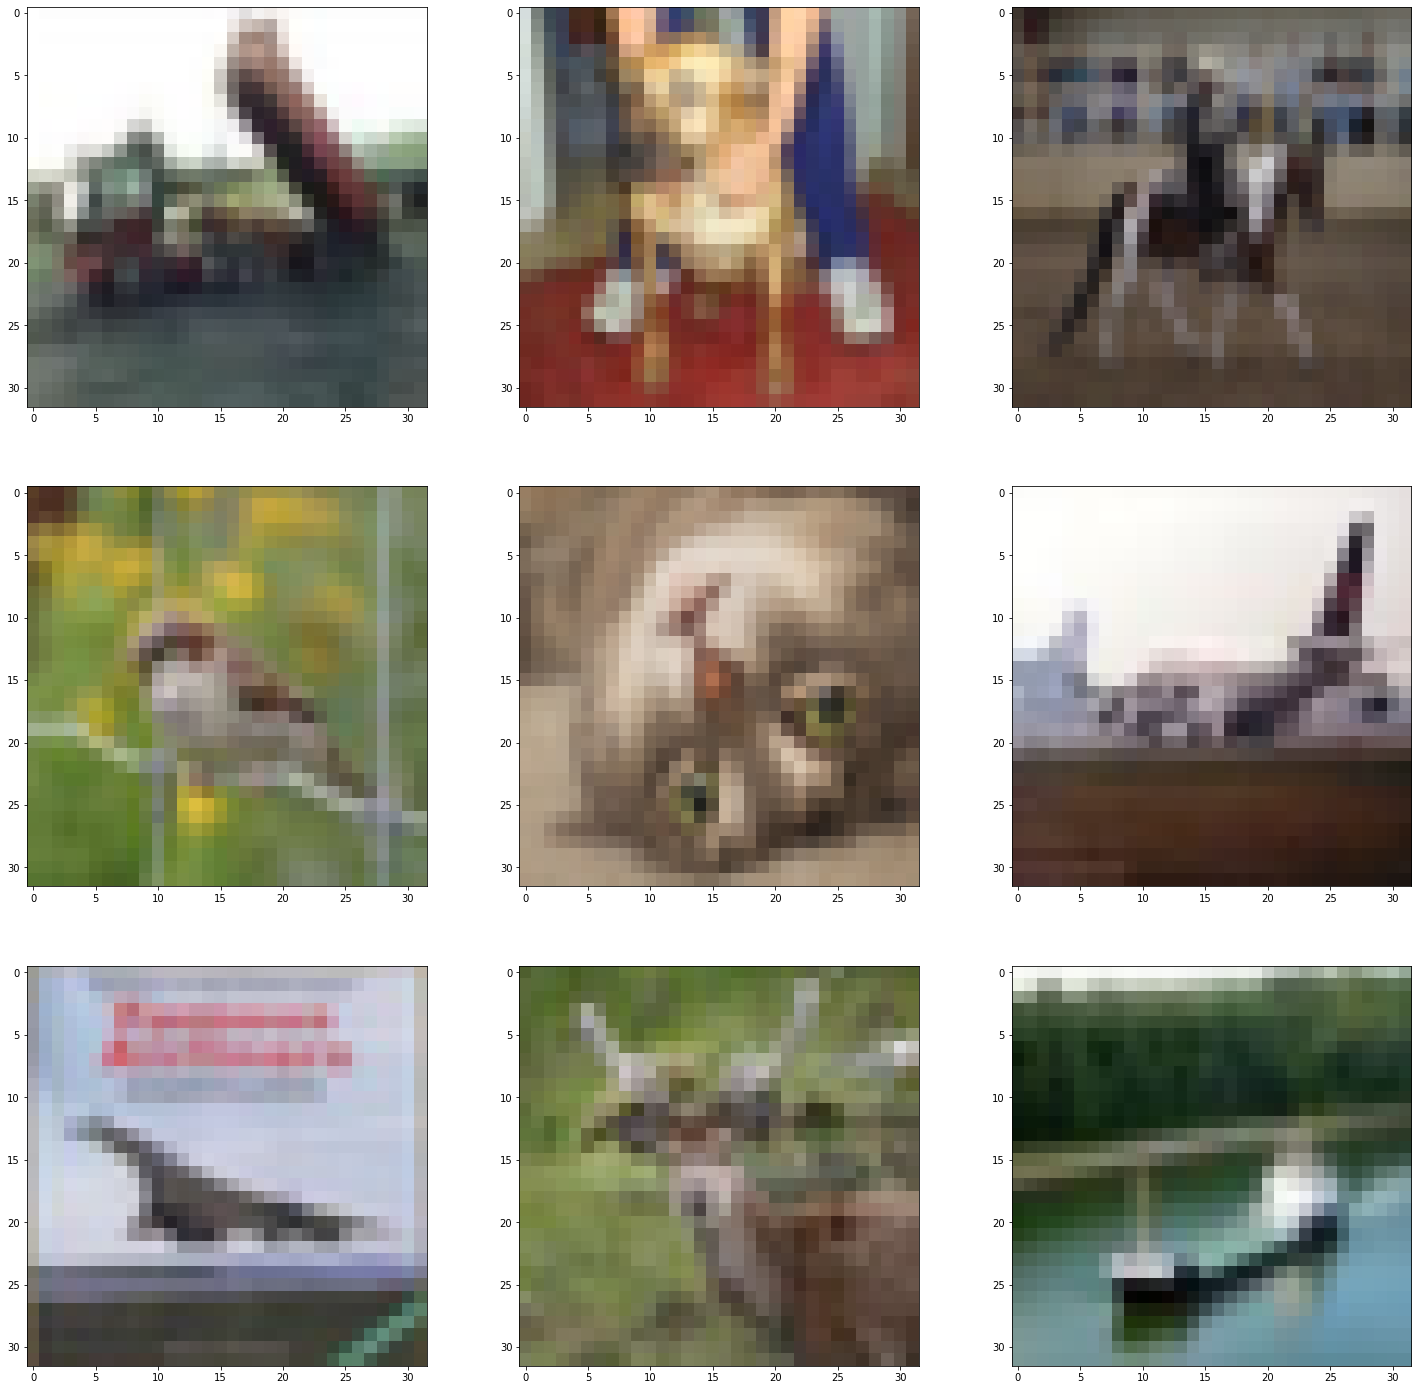

In [12]:
# Reshape and normalize 9 "random" images
im0 = data.data.iloc[2].values.reshape(-1,32,32).transpose(1,2,0)/255.
im1 = data.data.iloc[51].values.reshape(-1,32,32).transpose(1,2,0)/255.
im2 = data.data.iloc[2823].values.reshape(-1,32,32).transpose(1,2,0)/255.

im3 = data.data.iloc[1024].values.reshape(-1,32,32).transpose(1,2,0)/255.
im4 = data.data.iloc[2011].values.reshape(-1,32,32).transpose(1,2,0)/255.
im5 = data.data.iloc[8023].values.reshape(-1,32,32).transpose(1,2,0)/255.

im6 = data.data.iloc[10003].values.reshape(-1,32,32).transpose(1,2,0)/255.
im7 = data.data.iloc[15004].values.reshape(-1,32,32).transpose(1,2,0)/255.
im8 = data.data.iloc[19023].values.reshape(-1,32,32).transpose(1,2,0)/255.

# make a 3 x 3 figure
fig = plt.figure(figsize=(25,25))
# first image
ax = fig.add_subplot(331)
ax.imshow(im0)
# second image
ax = fig.add_subplot(332)
ax.imshow(im1)
# third image
ax = fig.add_subplot(333)
ax.imshow(im2)
# 4th image
ax = fig.add_subplot(334)
ax.imshow(im3)
# 5th image
ax = fig.add_subplot(335)
ax.imshow(im4)
# 6th image
ax = fig.add_subplot(336)
ax.imshow(im5)
# 7th image
ax = fig.add_subplot(337)
ax.imshow(im6)
# 8th image
ax = fig.add_subplot(338)
ax.imshow(im7)
# 9th image
ax = fig.add_subplot(339)
ax.imshow(im8)

**Question 7**: Where are the labels (`y`)?

In [13]:
data.target

0        6
1        9
2        9
3        4
4        1
        ..
19995    8
19996    3
19997    5
19998    1
19999    7
Name: class, Length: 20000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

## Preprocessing

Instead of all 10 classes, we want to just use the following three: airplane, automobile and deer. From ```data.DESCR``` we can see that these corresponds to the integers 0, 1 and 4.
### Normalize the data and remove all classes except three

The images are stored as ```uint8```, i.e. unsigned 8-bit integers, where the min value is 0 and max is 255. 

**Question 8**: How can you check whether I am lying or not?

In [15]:
data.data.min().min()

0.0

In [16]:
data.data.max().max()

255.0

In [17]:
np.unique(data.data)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

**Question 9**: How can we normalize the data so that all values are between 0 and 1?

In [18]:
X = data.data / 255
np.unique(X)

array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568627,
       0.01960784, 0.02352941, 0.02745098, 0.03137255, 0.03529412,
       0.03921569, 0.04313725, 0.04705882, 0.05098039, 0.05490196,
       0.05882353, 0.0627451 , 0.06666667, 0.07058824, 0.0745098 ,
       0.07843137, 0.08235294, 0.08627451, 0.09019608, 0.09411765,
       0.09803922, 0.10196078, 0.10588235, 0.10980392, 0.11372549,
       0.11764706, 0.12156863, 0.1254902 , 0.12941176, 0.13333333,
       0.1372549 , 0.14117647, 0.14509804, 0.14901961, 0.15294118,
       0.15686275, 0.16078431, 0.16470588, 0.16862745, 0.17254902,
       0.17647059, 0.18039216, 0.18431373, 0.18823529, 0.19215686,
       0.19607843, 0.2       , 0.20392157, 0.20784314, 0.21176471,
       0.21568627, 0.21960784, 0.22352941, 0.22745098, 0.23137255,
       0.23529412, 0.23921569, 0.24313725, 0.24705882, 0.25098039,
       0.25490196, 0.25882353, 0.2627451 , 0.26666667, 0.27058824,
       0.2745098 , 0.27843137, 0.28235294, 0.28627451, 0.29019

Before moving ahead it is best to fix the data type (```dtype```) of the targets and copy them to a new variable ```y```.

In [20]:
y = data.target.astype(int).copy()

In [21]:
y

0        6
1        9
2        9
3        4
4        1
        ..
19995    8
19996    3
19997    5
19998    1
19999    7
Name: class, Length: 20000, dtype: int64

**Question 10**: How can we remove all except the 3 classes that we want to retain (0, 1 and 4, see above)?

In [22]:
keep_ids = np.logical_or(y<2, y==4)
y = y[keep_ids]
y.shape

In [23]:
y

0        6
1        9
2        9
3        4
4        1
        ..
19995    8
19996    3
19997    5
19998    1
19999    7
Name: class, Length: 20000, dtype: int64

**Question 11**: How do we check that we kept the 3 classes?

In [28]:
np.unique(y)

array([0, 1, 4])

Keep in mind that it is not sufficient to only remove classes from ```y```, but we will have to remove the corresponding indeci from the inputs (```data.data```) too.

**Question 12**: How can we remove the corresponding indexes from the inputs?

In [29]:
X = X[keep_ids]


In [30]:
X.shape[0] == y.shape[0]

True

### Data split
We need to split the data into training and test sets. The former is used to train, or fit, the model, and the latter is used to test, or evaluate, the model.

**Question 13**: How can we use ```train_test_split``` (imported above) to partition the dataset into a training and a test set?

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

**Question 14**: How do we check that we didn't mix up train and test sets?

In [32]:
X_train.shape 

(4483, 3072)

In [33]:
y_test.shape

(1495,)

## Multi-class classification
The task is not a binary classification task, but a mulit-class since we have three and not just two classes.

![Multi-class](https://drive.google.com/uc?id=1rnyu4qrFy2BUFCq8eFVxVLwXZ9MkOXCD)

Image credit: [Alex Krizhevsky](https://cs231n.github.io/linear-classify/)
<!-- ![Network architecture](https://drive.google.com/uc?id=1-MSS49rORx9oMw4uBvbckHO1vx1fDV8i) -->


## Model fitting

In [34]:
model = LinearSVC()
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC()

**Question 15**: How can we predict the class label of a new image? E.g. ```X_test[512]```

In [35]:
np.reshape(X_test.iloc[512].values, (1, -1))

(3072, 1)

In [37]:
model.predict(np.reshape(X_test.iloc[512].values, (1, -1)))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  "X does not have valid feature names, but"


array([0])

**Question 16**: Was the prediction correct?

In [38]:
y_test.iloc[512]

1

## Evaluation

Average accuracy (i.e. average fraction correct predictions)

In [39]:
model.score(X_test, y_test)

0.6983277591973244

**Question 17**: What is chance performance (i.e. what performance do you expect from random guessing)?

**Queston 18:** How can we quickly estimate chance performance without making any assumptions about the class distribution?

In [41]:
rnd_ids = np.arange(y_test.shape[0])
np.random.shuffle(rnd_ids)
model.score(X_test, y_test.iloc[rnd_ids])

0.33043478260869563

With unbalanced (i.e. not equal number of examples of each class) data it is generally better evaluate performance with, for example, the F1-score.

**Question 19**: How can we use ```sklearn.metrics``` (imported above) to calcuate the F1-score?

In [42]:
metrics.f1_score(y_test, model.predict(X_test), average='micro')

0.6983277591973244